## Binary classification with Logistic regression 

### import libraries and file

In [9]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

In [40]:
 # import csv file and define column names
df = pd.read_csv('iris_dirty.csv', names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


### EDA - exploratory data analysis - get to know the data
### + Clean and wrangling steps 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [44]:
df['class'].unique()


array(['Iris-setosa', 'Iris-setsoa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

There was a mis-spelling of 'Iris-setsoa' revealed in the search for unique values. - replaced the incorrect spelling with the correct version here: 

In [45]:
df['class'].replace({'Iris-setsoa' : 'Iris-setosa'}, inplace=True)

Here I just ran through the list of values to see how many different lengths and sizes there are. 

In [46]:
df['sepal_length'].nunique()

36

In [47]:
df['sepal_width'].nunique()

23

In [48]:
df['petal_length'].nunique()

43

In [49]:
df['petal_width'].nunique()

22

In [51]:
#turn the petal width into a flaat in cm
df['petal_width'] = df['petal_width'].str.extract('(\d+)').astype('float64')


In [52]:
# i want to see the means etc 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,151.000000,150.000000,151.000000,151.000000
mean,6.196689,3.057333,3.764901,12.000000
std,4.324325,0.432776,1.760197,7.607891
min,4.300000,2.000000,1.000000,1.000000
25%,5.100000,2.800000,1.600000,3.000000
50%,5.800000,3.000000,4.400000,13.000000
75%,6.400000,3.300000,5.100000,18.000000
max,58.000000,4.400000,6.900000,25.000000


In [110]:
df['sepal_width'].value_counts()

3.000000    22
3.200000    13
2.800000    12
3.100000    12
3.400000    12
2.900000     9
2.700000     7
3.300000     6
3.500000     6
2.600000     4
3.057333     1
Name: sepal_width, dtype: int64

In [57]:
#Checks for null values in whole data set
df.isna().sum()

sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
class           0
dtype: int64

### Code to deal with nulls and blanks

In [73]:
#Option 1: use the fill null values formula then just type in the mean value by hand
df['sepal_width'].fillna((3.057333), inplace=True)

In [114]:
#Option 2: an alternative - more flexible - way to do this. Here we have a loop that 
#replaces blanks and spaces and nulls for the text 'unknown': 
def text4blanks(x):
    if x in ['', ' ', 0]:
        return 'unknown'
    else:
        return x

df['sepal_width'] = list(map(text4blanks, df['sepal_width']))

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   151 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    float64
 4   class         151 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visual EDA with charts

C:\Users\iLoveyou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

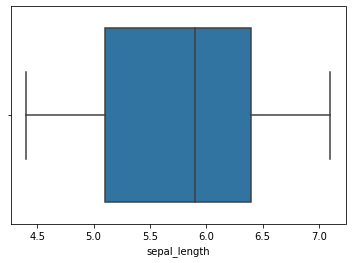

In [87]:
sns.boxplot(df['sepal_length'])

C:\Users\iLoveyou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_width'>

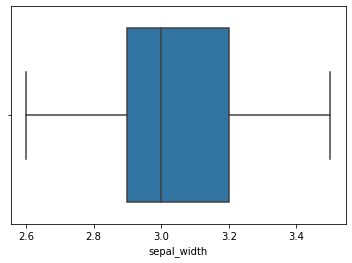

In [85]:
sns.boxplot(df['sepal_width'])

C:\Users\iLoveyou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length'>

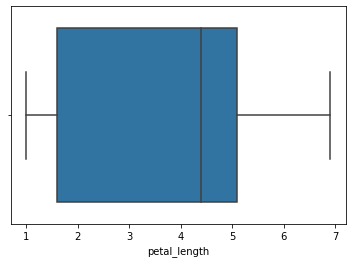

In [78]:
sns.boxplot(df['petal_length'])

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

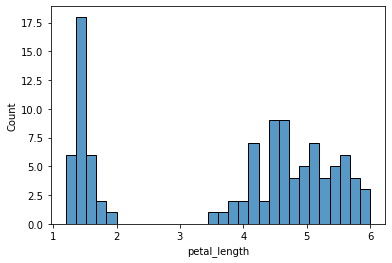

In [102]:
#Looks like all the values are within the iqr, but skewed to the right (high concentration of values in Q3). Let's confirm that with a historgram
sns.histplot(df['petal_length'], bins = 30)

In [103]:
#Weird spread of data. - but might be useful for the category definition. - So could be good news for our log regression model

C:\Users\iLoveyou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_width'>

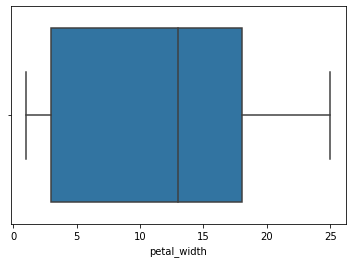

In [79]:
sns.boxplot(df['petal_width'])

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

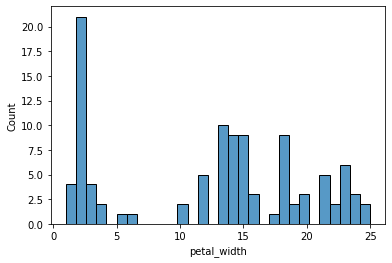

In [104]:
sns.histplot(df['petal_width'], bins = 30)

### Removing the outliers with this code:

In [88]:
iqr = np.percentile(df['sepal_length'],75) - np.percentile(df['sepal_length'],25)
upper_limit = np.percentile(df['sepal_length'],75) + 1.5*iqr
lower_limit = np.percentile(df['sepal_length'],25) - 1.5*iqr
df = df[(df['sepal_length']>lower_limit) & (df['sepal_length']<upper_limit)]


In [89]:
iqr = np.percentile(df['sepal_width'],75) - np.percentile(df['sepal_width'],25)
upper_limit = np.percentile(df['sepal_width'],75) + 1.5*iqr
lower_limit = np.percentile(df['sepal_width'],25) - 1.5*iqr
df = df[(df['sepal_width']>lower_limit) & (df['sepal_width']<upper_limit)]


### Check for intercorrelarity

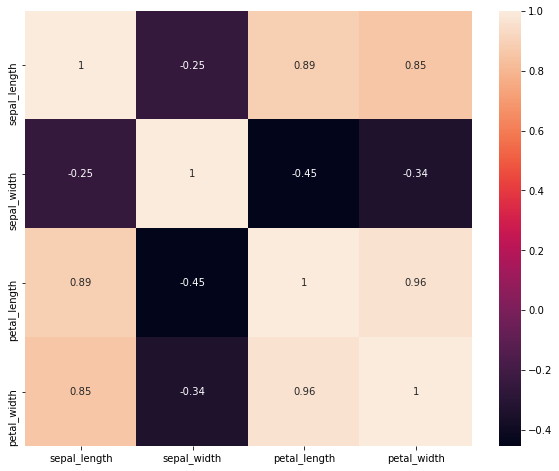

In [90]:
# check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Seperating categories out to look at them separately
In this example we only have one column that is a category type (type = object - in python terms). This code can be used for data frames that have several. Then you can get a good look at overall frequencies of each category. - an important factor in your modelling and one you might want to adjust for. 

Frequency analysis of column:  class


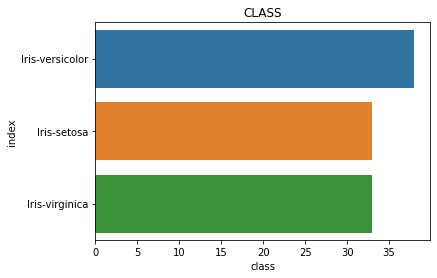

<Figure size 432x288 with 0 Axes>

In [105]:
## checking all the categorical columns
cols_cat = list(df.select_dtypes(include=['object']).columns)

for col in cols_cat:
    print("Frequency analysis of column: ",col)
    my_data = df[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print

### pre processing

#### Part 1. Take the 3 categories (names of the type of iris we are trying to predict. We need to slpit this away from the main body of the data and test the model one category at time on a binary basis. Is this a Iris_virginica? - yes or no. 

In [119]:
# label / encode any categorical columns 
cat = df.select_dtypes(include = np.object)

cat

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
6,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
148,Iris-virginica
149,Iris-virginica


In [145]:
categorical=pd.get_dummies(cat, columns =['class'])
categorical.head()

,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
6,1,0,0


In [146]:
categorical['class_Iris-setosa'].value_counts()

0    71
1    33
Name: class_Iris-setosa, dtype: int64

#### Part 2. Normalising the numerical data. All done with external libraries so hard to know exactly what is going on here. But basiccally the numerical data is all being scaled so that it is comparable. 

In [147]:
# numerical scaling 
from sklearn.preprocessing import Normalizer

X = df.select_dtypes(include=np.number)
transformer = Normalizer().fit(X)
X_normalised= transformer.transform(X)
X_normalised = pd.DataFrame(X_normalised)

### split off the dependant variable (label)

In [148]:
#sort out the categoricals 
y= df['class']
categorical=df.drop(['class'], axis=1)
categorical

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,2.0
1,4.9,3.0,1.4,2.0
2,4.7,3.2,1.3,2.0
3,4.6,3.1,1.5,2.0
6,4.6,3.4,1.4,3.0
...,...,...,...,...
145,6.7,3.3,5.7,25.0
146,6.7,3.0,5.2,23.0
148,6.5,3.0,5.2,20.0
149,6.2,3.4,5.4,23.0


In [149]:
# bring the numerical data (scaled)in with the x cat
X = np.concatenate((X_normalised, categorical),axis=1)


### tt split, get model

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

## apply model and train model 

In [152]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

### evaluate accuracy and test 

In [153]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [154]:
predictions

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [155]:
accuracy_score(y_test, predictions)

0.9761904761904762

In [156]:
# next steps would be to visualise the accuracy of the predictions in some ways 

# can i improve my model ?? 

### visualising accuracy - ROC / AUC

In [162]:
import sklearn.metrics as metrics
probs = classification.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

ValueError: multiclass format is not supported

In [164]:
#definitions 
# tpr = true positive rate 
# fpr = false positive rate

NameError: name 'fpr' is not defined

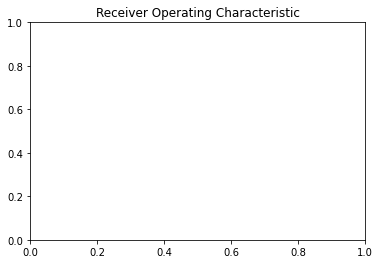

In [165]:
# method to plot AUC visually 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

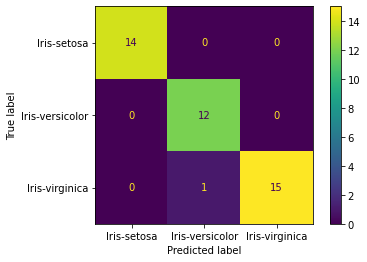

In [166]:
# confusion matrix 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()